In [3]:
import pandas as pd
import matplotlib.pyplot as plt #для роботи з графіками
import seaborn as sns #для роботи з графіками

In [5]:
dataset = pd.read_csv('titanic.csv')

#**Задача 1:** Який відсоток виживання серед чоловіків / жінок?

In [6]:
survival_rate = dataset.groupby("Sex")["Survived"].mean() * 100
print(survival_rate)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


#2 завдання відтворити графіки

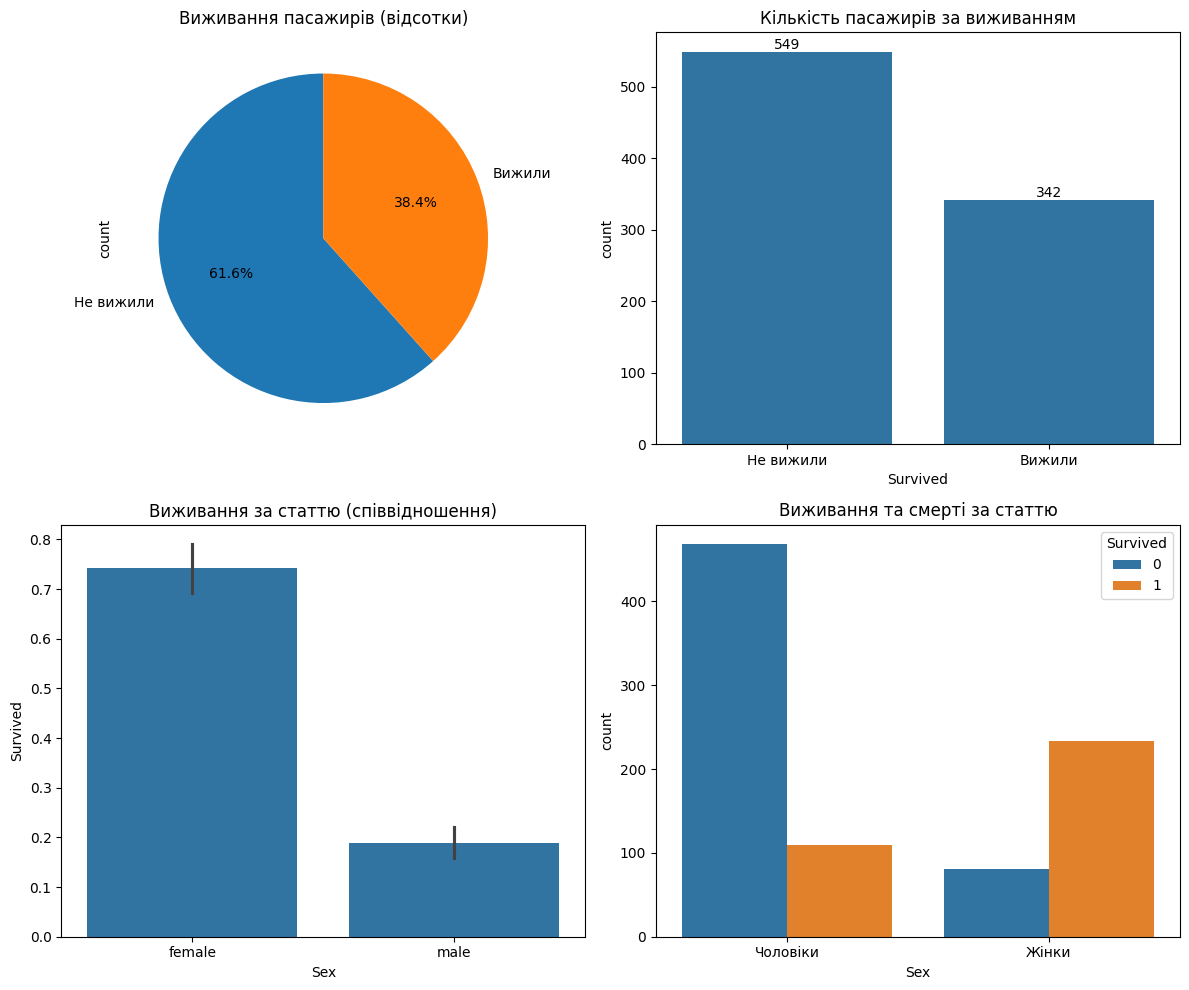

In [ ]:
plt.figure(figsize=(12, 10))

# Кругова діаграма виживання
plt.subplot(2, 2, 1)
dataset['Survived'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e'], labels=["Не вижили", "Вижили"])
plt.title('Виживання пасажирів (відсотки)')

# Стовпчикова діаграма виживання
plt.subplot(2, 2, 2)
bars = sns.countplot(x='Survived', data=dataset)
bars.set_xticks([0, 1])  # Встановлення позицій тіків
bars.set_xticklabels(["Не вижили", "Вижили"])  # Встановлення назв
bars.bar_label(bars.containers[0], label_type='edge')
plt.title('Кількість пасажирів за виживанням')

# Виживання за статтю (співвідношення)
plt.subplot(2, 2, 3)
sns.barplot(x="Sex", y="Survived", data=dataset, order=["female", "male"])
plt.title('Виживання за статтю (співвідношення)')

# Виживання та смерті за статтю
plt.subplot(2, 2, 4)
sns.countplot(x='Sex', hue='Survived', data=dataset, palette=['#1f77b4', '#ff7f0e'])
plt.title('Виживання та смерті за статтю')
plt.xticks([1, 0], ["Жінки", "Чоловіки"])

# Відображення графіків
plt.tight_layout()
plt.show()

# 3 кількість пропущених значень

In [8]:
missing_values = dataset.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# 4 5 найпопулярніші імена

In [9]:

dataset['Extracted Name'] = dataset['Name'].str.extract(r'(?:Miss\. |Mr\. )(.*)')
dataset['Extracted First Name'] = dataset['Extracted Name'].str.extract(r'(\w+)')


female_full_names = dataset[dataset['Sex'] == 'female']['Extracted First Name']
male_full_names = dataset[dataset['Sex'] == 'male']['Extracted First Name']


most_common_female_full_name = female_full_names.mode()[0] if not female_full_names.empty else "No data"
most_common_male_full_name = male_full_names.mode()[0] if not male_full_names.empty else "No data"

print("Найпопулярніше повне жіноче ім'я на кораблі:", most_common_female_full_name)
print("Найпопулярніше повне чоловіче ім'я на кораблі:", most_common_male_full_name)



Найпопулярніше повне жіноче ім'я на кораблі: Anna
Найпопулярніше повне чоловіче ім'я на кораблі: William


#6

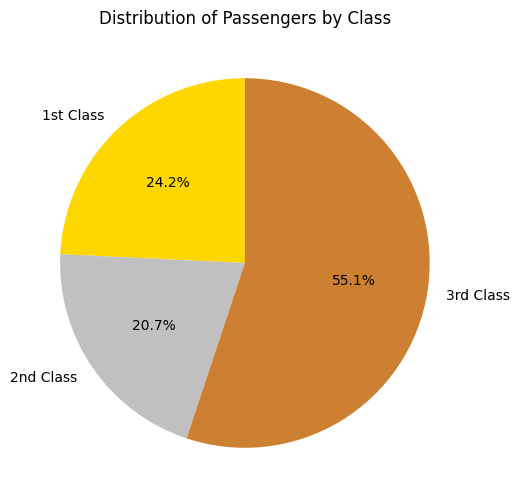

C:\Users\Liudmyla Rybak\AppData\Local\Temp\ipykernel_24852\2272509165.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=dataset, palette=colors)


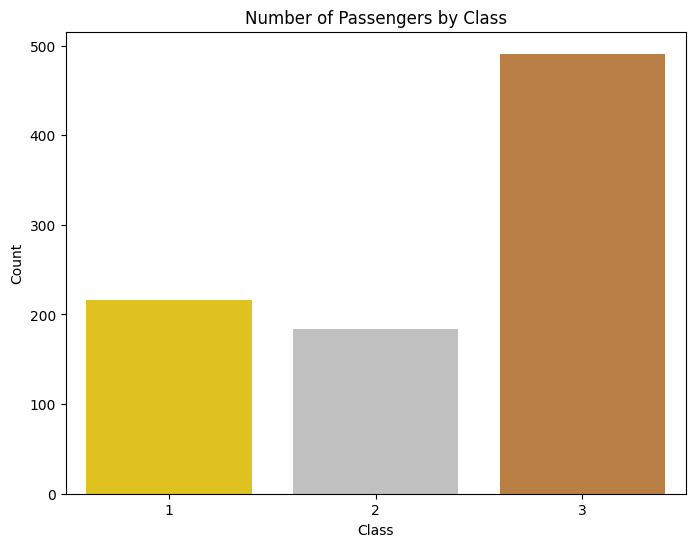

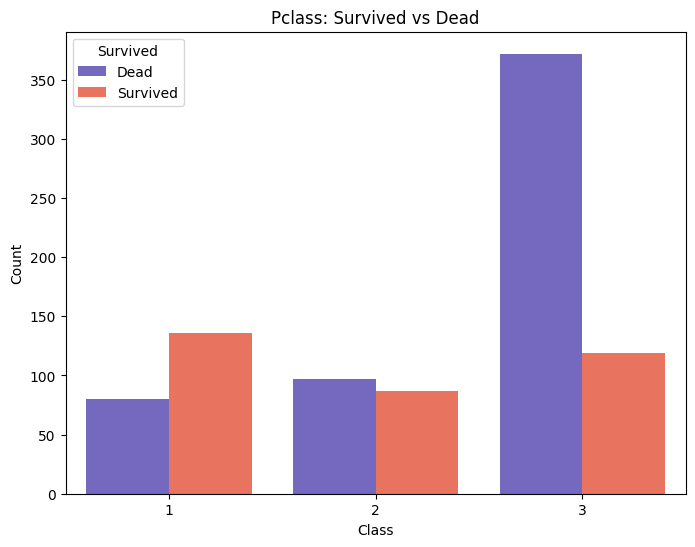

In [10]:
colors = ['#FFD700', '#C0C0C0', '#CD7F32'] 


class_counts = dataset['Pclass'].value_counts().sort_index()

# Створення кругової діаграми
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=['1st Class', '2nd Class', '3rd Class'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Passengers by Class')
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=dataset, palette=colors)
plt.title('Number of Passengers by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()



plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=dataset, palette=['#6A5ACD', '#FF6347'])  
plt.title('Pclass: Survived vs Dead')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Dead', 'Survived'])
plt.show()

7

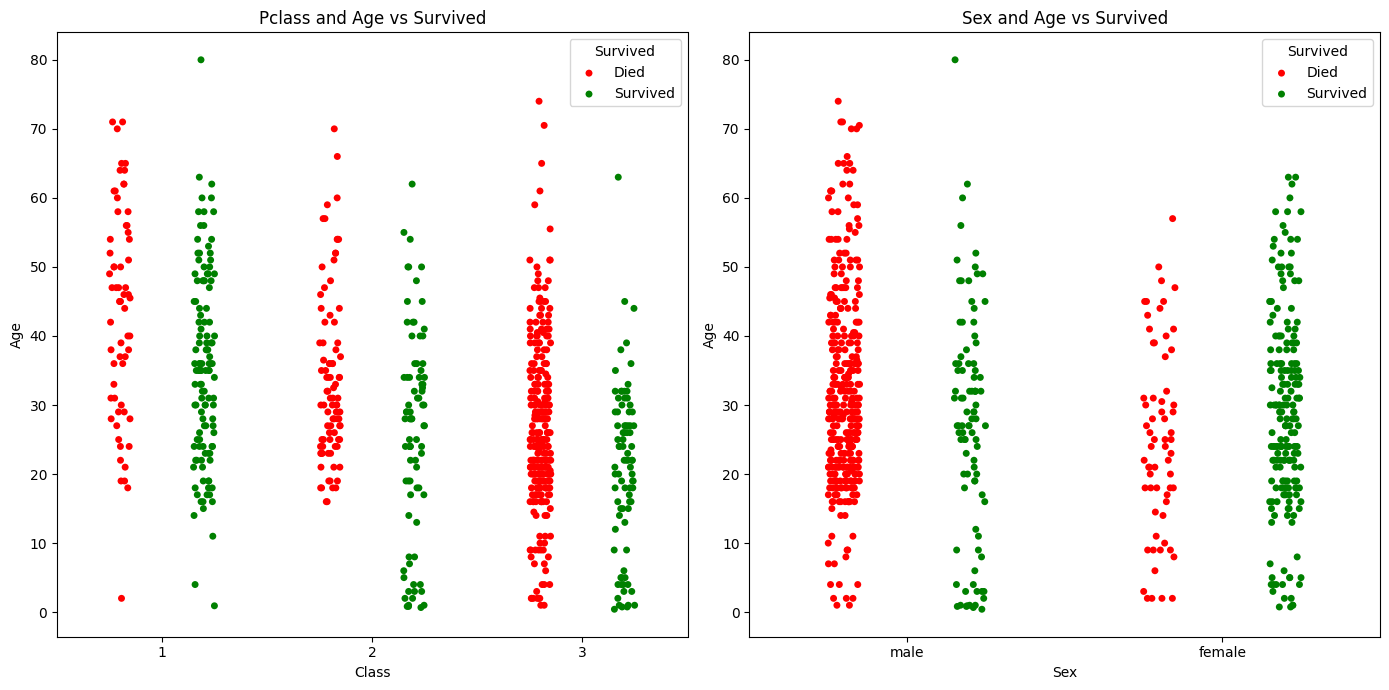

In [11]:
plt.figure(figsize=(14, 7))

# Графік для Pclass і Age vs Survived
plt.subplot(1, 2, 1)
sns.stripplot(x="Pclass", y="Age", hue="Survived", data=dataset, jitter=True, palette={0: "red", 1: "green"}, dodge=True)
plt.title("Pclass and Age vs Survived")
plt.xlabel("Class")
plt.ylabel("Age")
plt.legend(title='Survived', labels=['Died', 'Survived'])

# Графік для Sex і Age vs Survived
plt.subplot(1, 2, 2)
sns.stripplot(x="Sex", y="Age", hue="Survived", data=dataset, jitter=True, palette={0: "red", 1: "green"}, dodge=True)
plt.title("Sex and Age vs Survived")
plt.xlabel("Sex")
plt.ylabel("Age")
plt.legend(title='Survived', labels=['Died', 'Survived'])

plt.tight_layout()
plt.show()

#**Задача 8** Побудуйте наступні діаграми розподілів:

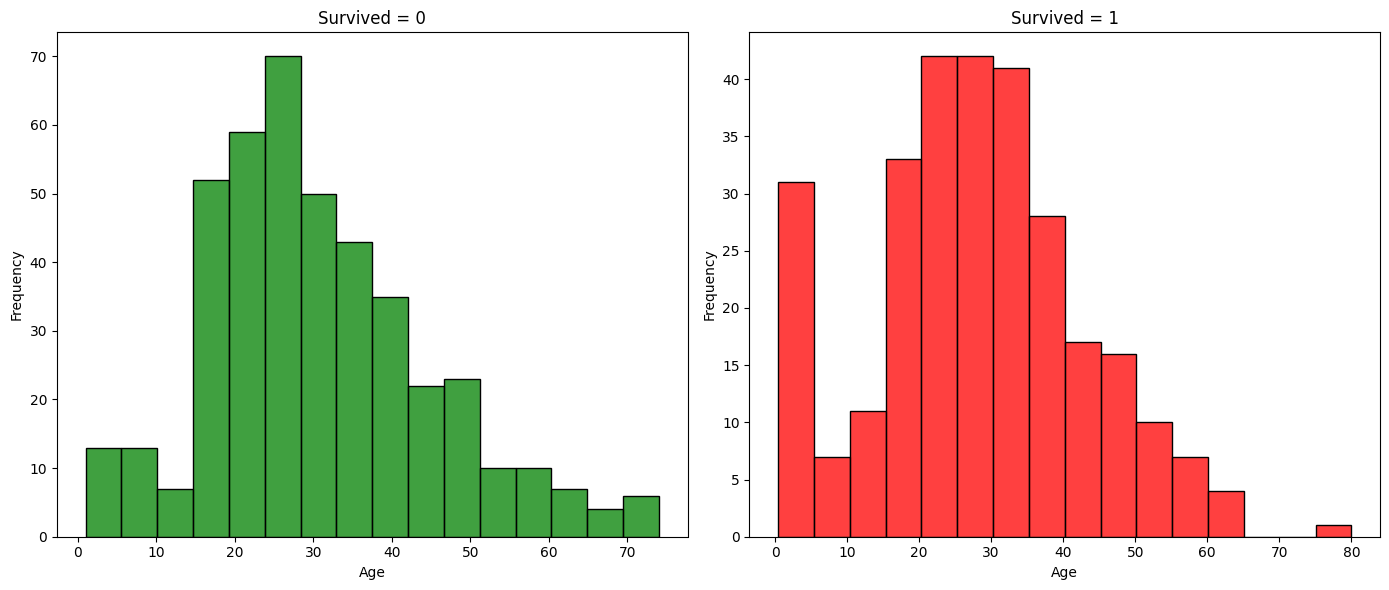

In [12]:
plt.figure(figsize=(14, 6))

# Гістограма для загиблих
plt.subplot(1, 2, 1)
sns.histplot(dataset[dataset['Survived'] == 0]['Age'], color="green", bins=16, kde=False)
plt.title('Survived = 0')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Гістограма для виживших
plt.subplot(1, 2, 2)
sns.histplot(dataset[dataset['Survived'] == 1]['Age'], color="red", bins=16, kde=False)
plt.title('Survived = 1')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#**Задача 9:** Побудуйте наступні діаграми та проведіть аналітику шансів на виживання серед пасажирів:


C:\Users\Liudmyla Rybak\AppData\Local\Temp\ipykernel_24852\1010833687.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=dataset, palette='Pastel1')


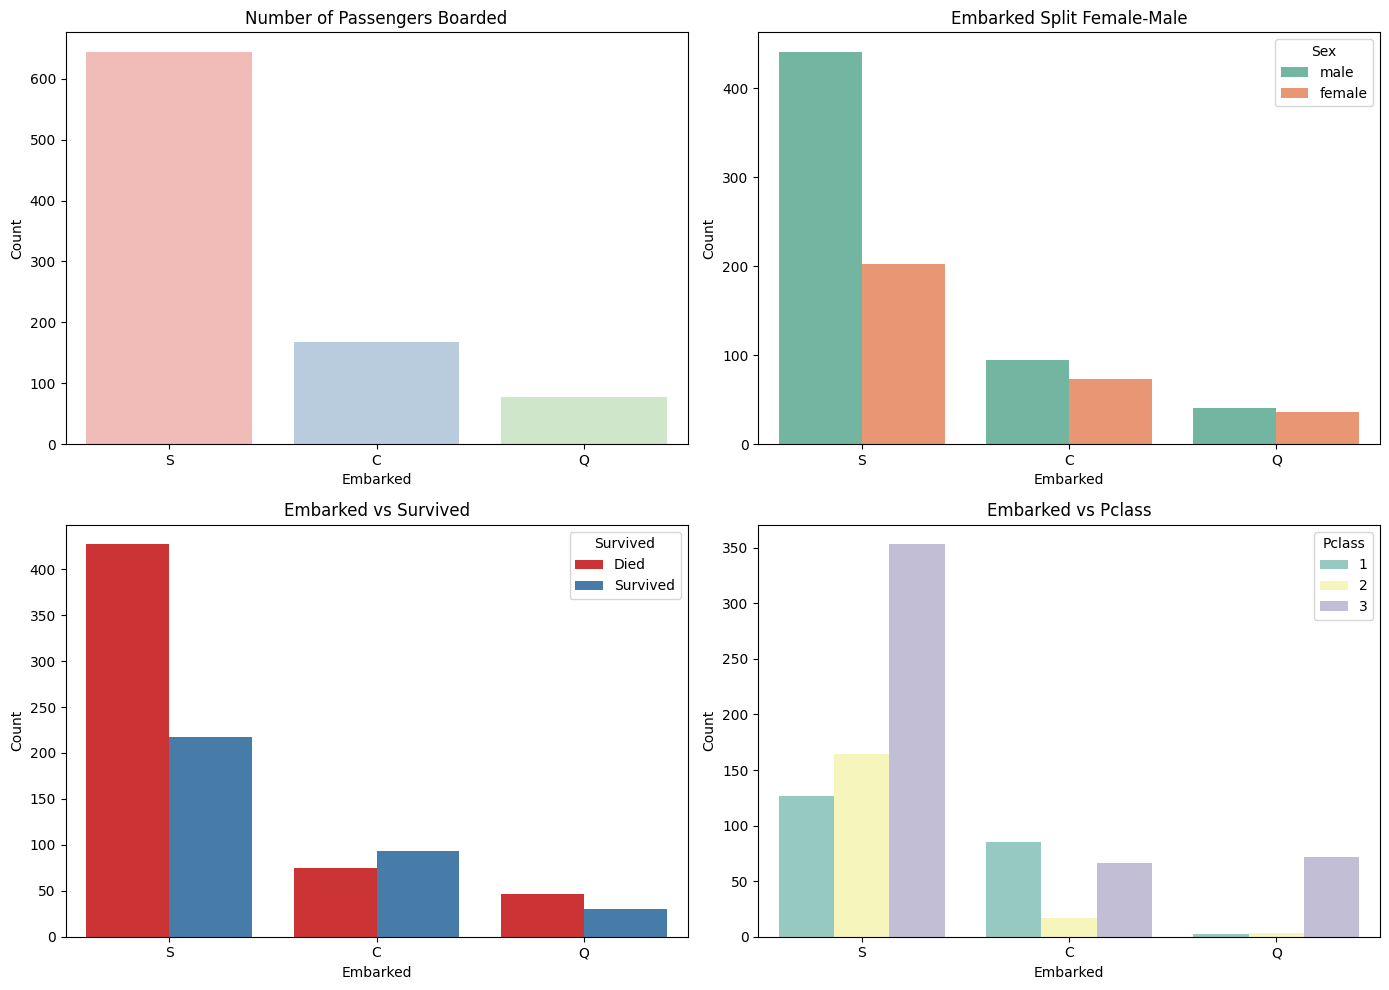

In [13]:
plt.figure(figsize=(14, 10))

#Діаграма:загальна кількість пасажирів, які сіли на борт за місцем посадки
plt.subplot(2, 2, 1)
sns.countplot(x='Embarked', data=dataset, palette='Pastel1')
plt.title('Number of Passengers Boarded')
plt.xlabel('Embarked')
plt.ylabel('Count')

#Діаграма: розподіл за статтю серед пасажирів за місцем посадки
plt.subplot(2, 2, 2)
sns.countplot(x='Embarked', hue='Sex', data=dataset, palette='Set2')
plt.title('Embarked Split Female-Male')
plt.xlabel('Embarked')
plt.ylabel('Count')

#Діаграма: виживання пасажирів за місцем посадки
plt.subplot(2, 2, 3)
sns.countplot(x='Embarked', hue='Survived', data=dataset, palette='Set1')
plt.title('Embarked vs Survived')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Died', 'Survived'])

#Діаграма: розподіл за класом квитка серед пасажирів за місцем посадки
plt.subplot(2, 2, 4)
sns.countplot(x='Embarked', hue='Pclass', data=dataset, palette='Set3')
plt.title('Embarked vs Pclass')
plt.xlabel('Embarked')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# ***Завдача 10** Побудуйте діаграму розподілу вартості квитка відповідно до якого классу належіть пасажир.

C:\Users\Liudmyla Rybak\AppData\Local\Temp\ipykernel_24852\333269990.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Fare', data=dataset, estimator=lambda x: sum(x)/len(x), ci=None, palette='Set2')
C:\Users\Liudmyla Rybak\AppData\Local\Temp\ipykernel_24852\333269990.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Fare', data=dataset, estimator=lambda x: sum(x)/len(x), ci=None, palette='Set2')


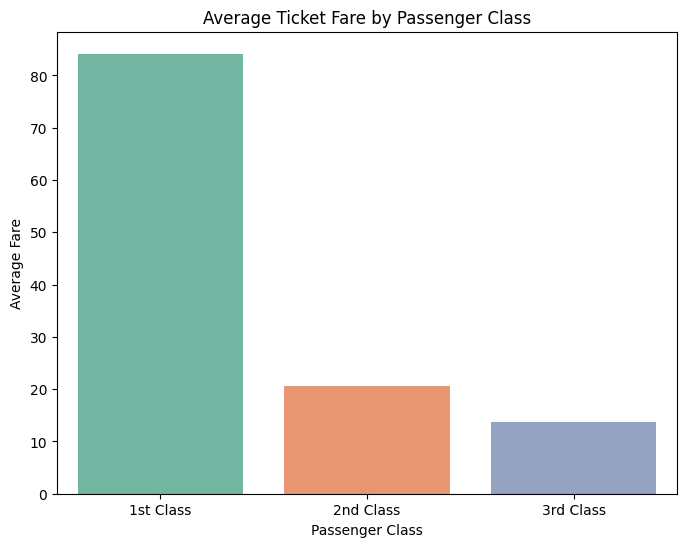

In [14]:
plt.figure(figsize=(8, 6))

sns.barplot(x='Pclass', y='Fare', data=dataset, estimator=lambda x: sum(x)/len(x), ci=None, palette='Set2')
plt.title('Average Ticket Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])  # Встановлення назв класів на осі X

plt.show()